# Grace's First Notebook

## Working on getting to know the data, thinking of some research questions

### Possible questions:

- How much are top merchants spending per order? Are we retaining these top buyers?
- On average, what are me making per order? 
- Do we earn more from bulk purchases from large merchants, or from smaller, more consistent buyers?
- What are the top items purchased? Has interest increased over time?
- Who are our most consistent customers? (Consistent = buying significant product regularly over a long span of time)

## Business questions:
- Is it possible to play multiple orders at the same time? In previous notebook, some of the different orders placed at the same millisecond were by the same merchant. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
baskets = pd.read_csv('baskets_sample_random_10.csv')

## Simple tests to figure out how to read data

In [4]:
baskets.count()

id             29305
order_id       29305
placed_at      29305
merchant_id    29305
sku_id         29305
top_cat_id     29298
sub_cat_id     29298
qty            29305
price          29305
dtype: int64

In [5]:
baskets[baskets['price'] > 292000.0].count()

id             2509
order_id       2509
placed_at      2509
merchant_id    2509
sku_id         2509
top_cat_id     2509
sub_cat_id     2509
qty            2509
price          2509
dtype: int64

In [6]:
baskets[baskets['sku_id'] == 702].count()

id             218
order_id       218
placed_at      218
merchant_id    218
sku_id         218
top_cat_id     218
sub_cat_id     218
qty            218
price          218
dtype: int64

### Snapshot of dataframe 

In [7]:
baskets[1:]

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
1,166,41,2021-05-06 10:45:02.448,196,341,3.0,47.0,2,0.0
2,167,42,2021-05-06 10:45:04.850,196,341,3.0,47.0,2,0.0
3,168,43,2021-05-06 10:48:00.927,197,457,12.0,30.0,20,0.0
4,169,44,2021-05-06 10:51:28.980,198,341,3.0,47.0,5,0.0
5,170,44,2021-05-06 10:51:28.980,198,457,12.0,30.0,10,0.0
...,...,...,...,...,...,...,...,...,...
29300,338870,61206,2022-07-31 16:52:33.731,428,1896,4.0,57.0,80,12350.0
29301,338871,61206,2022-07-31 16:52:33.731,428,747,12.0,36.0,1,86000.0
29302,338872,61206,2022-07-31 16:52:33.731,428,850,9.0,48.0,1,101500.0
29303,338873,61206,2022-07-31 16:52:33.731,428,853,9.0,48.0,1,68500.0


### id of first order? To get id use 1 rather than 0- 0 must be the identifier for the very first column rather than the first column of data.

In [8]:
baskets.iloc[1,0]

166

In [9]:
baskets.iloc[29304, 2]

'2022-07-31 16:52:33.731'

### Note columns for future reference

In [10]:
baskets.columns

Index(['id', 'order_id', 'placed_at', 'merchant_id', 'sku_id', 'top_cat_id',
       'sub_cat_id', 'qty', 'price'],
      dtype='object')

### Note that the use of numbers to hide product and merchant info may be confusing- look at these numbers as numerical identifiers, not mathematical values.

In [11]:
baskets.sum()

id                                                    4775191340
order_id                                               801118634
placed_at      2021-05-05 11:04:46.5792021-05-06 10:45:02.448...
merchant_id                                             31094175
sku_id                                                  28648236
top_cat_id                                              318204.0
sub_cat_id                                             1488587.0
qty                                                    202840187
price                                          4041550272.440521
dtype: object

In [12]:
baskets.describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
count,29305.000000,29305.000000,29305.000000,29305.000000,29298.000000,29298.000000,2.930500e+04,2.930500e+04
mean,162948.006825,27337.267838,1061.053574,977.588671,10.860946,50.808485,6.921692e+03,1.379133e+05
std,95745.525000,18450.495064,761.056051,348.157681,8.353926,31.280838,1.168396e+06,1.355361e+05
min,126.000000,23.000000,10.000000,5.000000,1.000000,1.000000,1.000000e+00,0.000000e+00
25%,80106.000000,10296.000000,352.000000,755.000000,4.000000,30.000000,1.000000e+00,4.550000e+04
50%,158748.000000,25824.000000,934.000000,875.000000,9.000000,48.000000,2.000000e+00,1.070000e+05
75%,242651.000000,43776.000000,1717.000000,1055.000000,15.000000,79.000000,5.000000e+00,1.845000e+05
max,338874.000000,61439.000000,3160.000000,2383.000000,35.000000,108.000000,2.000000e+08,2.175000e+06


### From describe function, we find that the average order is for 6.921 items, and the average price per order is 1.379 dollars.

## Trying to learn covariance meaning and use

In [13]:
baskets.cov()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price
id,9.167206e+09,1.761676e+09,2.894300e+07,8.746761e+06,11811.857955,50915.294886,7.612809e+08,2.785898e+08
order_id,1.761676e+09,3.404208e+08,5.477361e+06,1.676017e+06,2416.691685,9535.836604,1.542931e+08,4.288260e+07
merchant_id,2.894300e+07,5.477361e+06,5.792063e+05,3.689526e+04,202.489916,347.874643,1.269334e+07,8.333774e+04
sku_id,8.746761e+06,1.676017e+06,3.689526e+04,1.212138e+05,237.393656,1788.915178,3.833156e+06,1.470711e+06
top_cat_id,1.181186e+04,2.416692e+03,2.024899e+02,2.373937e+02,69.788084,47.294869,-4.646834e+04,-2.984864e+03
sub_cat_id,5.091529e+04,9.535837e+03,3.478746e+02,1.788915e+03,47.294869,978.490849,-1.351184e+05,1.221353e+05
qty,7.612809e+08,1.542931e+08,1.269334e+07,3.833156e+06,-46468.343996,-135118.437323,1.365150e+12,-9.540640e+08
price,2.785898e+08,4.288260e+07,8.333774e+04,1.470711e+06,-2984.863562,122135.260434,-9.540640e+08,1.837003e+10


### What does this mean? Should this function be called on less data?

## Parsing out individual rows/ columns:

In [14]:
baskets['id']

0           126
1           166
2           167
3           168
4           169
          ...  
29300    338870
29301    338871
29302    338872
29303    338873
29304    338874
Name: id, Length: 29305, dtype: int64

### Specific row and column: df.loc[row,column] *has to be column name, not number*

In [15]:
baskets.loc[2]

id                                 167
order_id                            42
placed_at      2021-05-06 10:45:04.850
merchant_id                        196
sku_id                             341
top_cat_id                         3.0
sub_cat_id                        47.0
qty                                  2
price                              0.0
Name: 2, dtype: object

In [16]:
baskets.loc[346,'id']

4922

# Start answering some questions

#### 1. How much are the top ten merchants spending per order on average? (Top ten most often buying) - needs revision
- Start by finding top ten most frequent merchants

In [40]:
baskets["spent"] = baskets["qty"] * baskets["price"]

In [42]:
baskets.head(100)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,spent
0,126,23,2021-05-05 11:04:46.579,10,341,3.0,47.0,100,0.0,0.0
1,166,41,2021-05-06 10:45:02.448,196,341,3.0,47.0,2,0.0,0.0
2,167,42,2021-05-06 10:45:04.850,196,341,3.0,47.0,2,0.0,0.0
3,168,43,2021-05-06 10:48:00.927,197,457,12.0,30.0,20,0.0,0.0
4,169,44,2021-05-06 10:51:28.980,198,341,3.0,47.0,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,2029,344,2021-06-15 09:57:31.177,349,233,16.0,87.0,1,0.0,0.0
96,2030,344,2021-06-15 09:57:31.177,349,287,14.0,37.0,2,83500.0,167000.0
97,2031,344,2021-06-15 09:57:31.177,349,556,15.0,97.0,3,52500.0,157500.0
98,2032,344,2021-06-15 09:57:31.177,349,114,25.0,106.0,1,121000.0,121000.0


In [17]:
list = baskets['merchant_id'].value_counts()[:10].index.tolist()
print(list)

[352, 1753, 951, 496, 349, 185, 1067, 488, 168, 398]


In [39]:
baskets.groupby(['merchant_id']).price.sum().sort_values(ascending = False)

merchant_id
352     332151900.0
1753    150617400.0
1497    146680500.0
951     135886476.0
1067    105858106.0
           ...     
720         14350.0
2315        14350.0
2735        12100.0
46          12000.0
2947         4291.0
Name: price, Length: 317, dtype: float64

##### - Next, find how many orders each merchant has made total, in the order of the previous list

In [18]:
for i in range(10):
 print(baskets[baskets['merchant_id'] == list[i]].count()['id'])

1986
1163
950
791
765
758
754
677
659
594


#### Now try to add up the cost of one merchant's total orders over time (Use first one for example) Problem: Quantity and Price needed.

In [29]:
print(baskets[baskets['merchant_id'] == 352].sum()['price'])

332151900.0


### Similar function as before to get all 10 outputs:

In [30]:
baskets.groupby(['merchant_id']).order_id.nunique().sort_values(ascending = False)

merchant_id
488     155
398     154
951     154
1951    153
1067    144
       ... 
1811      1
1806      1
1799      1
1796      1
3160      1
Name: order_id, Length: 317, dtype: int64

In [32]:
for i in range(10):
 print(baskets[baskets['merchant_id'] == list[i]].sum()['price'])

332151900.0
150617400.0
135886476.0
103489034.72727272
85935084.0
73866200.0
105858106.0
99062176.42857143
73859850.0
61358900.0


#### Maximum spent was merchant_id 352 with 332151900.0. Is this the same max as the overall spent? Question to explore later further.

#### Now let's find how much they all spend on average per order by dividing their purchasing total by the number of purchases made.

In [27]:
for i in range(10):
    print((baskets[baskets['merchant_id'] == list[i]].sum()['price']* baskets[baskets['merchant_id'] == list[i]].sum()['qty'])/ baskets[baskets['merchant_id'] == list[i]].count()['id'])

3350954415.10574
529815806.8787618
1057053744.8842105
485914380.50201124
413050070.41568625
215361875.98944592
549788253.4429709
6056254682.721039
432511625.4172989
165792987.37373737


#### In conclusion, I found that the most common purchasing merchant is #352, who also spent the most in total out of the most common purchasers, and spends the most on average per order out of the 10 most frequent purchasers. This shows that #352 is a highly valuable customer, later it may be useful to observe their purchasing patterns over time. 
#### Further questions:
- Is #352 the highest spender over all merchants?
- How many of the most frequent purchasers are also in the list of highest paying customers?
- How much are the top ten highest paying merchants spending per order?

<AxesSubplot:>

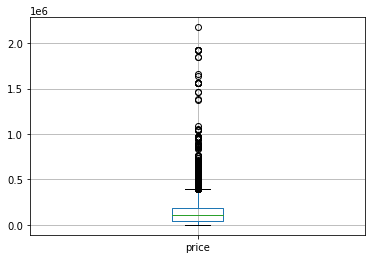

In [22]:
baskets.boxplot(column = 'price')

<AxesSubplot:>

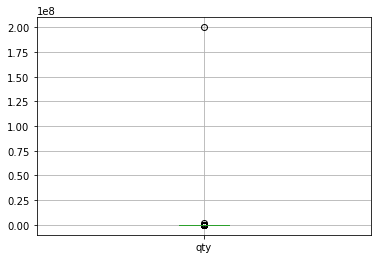

In [25]:
baskets.boxplot(column = 'qty')

## Possible question: Seasonal items? (plot months that sku's sell more or less in)

## ^ on above question: Can we figure out seasonal buying patterns so that the comapny can stock up on certain items more often at certain times to spend money more efficiently? Look into indonesian climate and seasons.